# Spam classifier using classic ML

### We will use the popular SMS Spam Collection dataset. It contains around 5,500 text messages labeled as either "spam" or "not spam."

In [63]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
data = pd.read_csv(url, sep='\t', header=None, names=["label", "message"])

In [64]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Let's perform text preprocessing. We will remove extra spaces, convert words to lowercase, clean messages from punctuation marks, and remove stop words.

In [66]:
import unicodedata
import sys
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Creating set of stop-words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Creating dictionary for clean data from puctuation
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))

# Creating capitalizer func to preprocess text data
def preprocess_text(text):
    if isinstance(text, str): 
        text = text.strip() # deleting spaces
        text = text.lower() # lowercase
        text = text.translate(punctuation) # clear punctuation
        words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words] # delete stop words
        return ' '.join(words)  
    return ''  

data['cleaned_message'] = data['message'].apply(preprocess_text) #creatint new column with cleaned messages



data.head()

,label,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


### Let's look at the data description

In [68]:
data.describe()

,label,message,cleaned_message
count,5572,5572,5572
unique,2,5169,5117
top,ham,"Sorry, I'll call later",sorry ill call later
freq,4825,30,30


### We can see that the dataset contains duplicates. Let's remove them.

In [70]:
data_cleaned = data.drop_duplicates(subset=['cleaned_message']) #deleting duplicates
data_cleaned.head()

,label,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


### Let's create a new DataFrame without the column containing the raw (uncleaned) messages.

In [3]:
data_dcleanned = data_cleaned.drop('message', axis=1) # deleting 'message'
data_dcleanned.head()

NameError: name 'data_cleaned' is not defined

### Let's take a look at the description of our data.

In [1]:
data_dcleanned.describe()

NameError: name 'data_dcleanned' is not defined

### Let's analyze the distribution of our labels by count.

In [76]:
data['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

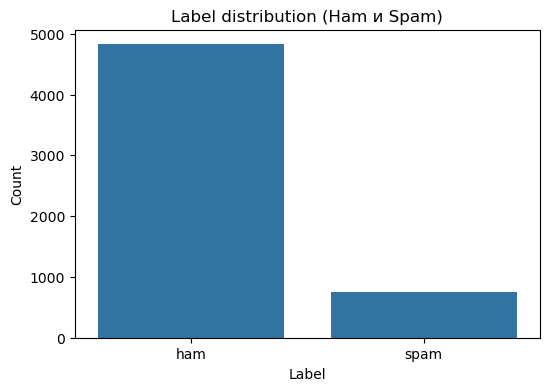

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 4)) #creating histogramm
sns.countplot(x='label', data=data) 
plt.title('Label distribution (Ham и Spam)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


### Let's create features and targets for classification. Then, we will split the data into training and test sets.

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Creating BoW(Bag of Words) using CountVectorizer
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(data['cleaned_message'])

# Encoding labels into (0, 1)
encoder = LabelEncoder()
targets = encoder.fit_transform(data['label'])

# Split data to train and test data sets
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=0.2, random_state=42)


### We will use the following models for classification and determine the accuracy of each one:
* LogisticRegression(LR)
* KNeigboursClassifier(KNN)
* DesicionTreeClassifier(CART)
* GaussianNB(NB)
* LinearSVC(LSVC)
* SVC
* BaggingClassifier(BG)
* RandomForestClassifier(RF)
* ExtraTreesClassifier(ET)
* AdaBoostClassifier(AB)
* GradientBoostingClassifier(GB)

In [81]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
import warnings

warnings.filterwarnings("ignore")

seed = 7
num_folds = 10
n_estimators = 100
scoring = 'accuracy'

models = [
    ('LR', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('LSVC', LinearSVC()),
    ('SVC', SVC(kernel='linear', probability=True)),
    ('BG', BaggingClassifier(n_estimators=n_estimators)),
    ('RF', RandomForestClassifier(n_estimators=n_estimators)),
    ('ET', ExtraTreesClassifier(n_estimators=n_estimators)),
    ('AB', AdaBoostClassifier(n_estimators=n_estimators)),
    ('GB', GradientBoostingClassifier(n_estimators=n_estimators)),
]

#  Results DataFrame Initialization
results_df = pd.DataFrame(
    columns=["Model", "Train_Accuracy", "Test_Accuracy", "F1_Score", "Precision", "Recall"]
)

# Evaluating Models
for name, model in models:
    print(f"Evaluating {name}...")

    # Cross-validation setup
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    # If model requires dense array, convert accordingly
    if name in ['NB']:
        features_train_dense = features_train.toarray()
        features_test_dense = features_test.toarray()
    else:
        features_train_dense = features_train
        features_test_dense = features_test

    # Cross-validation score
    cv_results = cross_val_score(model, features_train_dense, targets_train, cv=kfold, scoring=scoring)

    # Model fitting and prediction
    model.fit(features_train_dense, targets_train)
    predictions = model.predict(features_test_dense)

    # Metrics calculation
    test_accuracy = accuracy_score(targets_test, predictions)
    f1 = f1_score(targets_test, predictions, average='weighted')
    precision = precision_score(targets_test, predictions, average='weighted')
    recall = recall_score(targets_test, predictions, average='weighted')

    # Printing results
    print(
        f"{name}: Train Accuracy = {cv_results.mean():.3f} (std: {cv_results.std():.3f}), "
        f"Test Accuracy = {test_accuracy:.3f}, F1 Score = {f1:.3f}, "
        f"Precision = {precision:.3f}, Recall = {recall:.3f}"
    )

    # Storing results in DataFrame
    new_row = pd.DataFrame(
    {
        "Model": [name],
        "Train_Accuracy": [cv_results.mean()],
        "Test_Accuracy": [test_accuracy],
        "F1_Score": [f1],
        "Precision": [precision],
        "Recall": [recall],
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

#  Displaying Results
print("\nFinal Results Summary:")
print(results_df)

#  Sorting by Test Accuracy and displaying top models
results_df.sort_values(by="Test_Accuracy", ascending=False, inplace=True)


Evaluating LR...
LR: Train Accuracy = 0.976 (std: 0.009), Test Accuracy = 0.985, F1 Score = 0.984, Precision = 0.985, Recall = 0.985
Evaluating KNN...
KNN: Train Accuracy = 0.909 (std: 0.014), Test Accuracy = 0.918, F1 Score = 0.902, Precision = 0.925, Recall = 0.918
Evaluating CART...
CART: Train Accuracy = 0.964 (std: 0.009), Test Accuracy = 0.963, F1 Score = 0.963, Precision = 0.962, Recall = 0.963
Evaluating NB...
NB: Train Accuracy = 0.888 (std: 0.015), Test Accuracy = 0.891, F1 Score = 0.901, Precision = 0.928, Recall = 0.891
Evaluating LSVC...
LSVC: Train Accuracy = 0.979 (std: 0.007), Test Accuracy = 0.985, F1 Score = 0.984, Precision = 0.985, Recall = 0.985
Evaluating SVC...
SVC: Train Accuracy = 0.979 (std: 0.008), Test Accuracy = 0.986, F1 Score = 0.985, Precision = 0.986, Recall = 0.986
Evaluating BG...
BG: Train Accuracy = 0.971 (std: 0.010), Test Accuracy = 0.972, F1 Score = 0.971, Precision = 0.972, Recall = 0.972
Evaluating RF...
RF: Train Accuracy = 0.971 (std: 0.008),

### The top five models based on test accuracy:

In [83]:
results_df.head()

,Model,Train_Accuracy,Test_Accuracy,F1_Score,Precision,Recall
5,SVC,0.979365,0.985650,0.985348,0.985749,0.985650
0,LR,0.976448,0.984753,0.984359,0.985017,0.984753
4,LSVC,0.979140,0.984753,0.984408,0.984872,0.984753
8,ET,0.974204,0.979372,0.978701,0.979645,0.979372
9,AB,0.971958,0.979372,0.978971,0.979158,0.979372


### The top three models are: SVC, LR, and LSVC. We will perform hyperparameter tuning for them using GridSearchCV.

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

# Define the parameter grids
param_grid_svc = {
    'C': [0.1, 1, 10],  # Regularization strength
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient (for 'rbf' kernel)
}

param_grid_lsvc = {
    'C': [0.1, 1, 10],  # Regularization strength
    'max_iter': [1000, 2000]  # Maximum iterations
}

param_grid_lr = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solver for optimization
    'max_iter': [1000, 2000]  # Maximum iterations
}

# Initialize models
svc = SVC(probability = True)
lsvc = LinearSVC()
lr = LogisticRegression(max_iter=1000)

# Set up GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_lsvc = GridSearchCV(estimator=lsvc, param_grid=param_grid_lsvc, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid searches
grid_search_svc.fit(features_train_dense, targets_train)
grid_search_lsvc.fit(features_train_dense, targets_train)
grid_search_lr.fit(features_train_dense, targets_train)

# Output best hyperparameters
print("Best Parameters for SVC:", grid_search_svc.best_params_)
print("Best Parameters for LSVC:", grid_search_lsvc.best_params_)
print("Best Parameters for LR:", grid_search_lr.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Parameters for LSVC: {'C': 0.1, 'max_iter': 1000}
Best Parameters for LR: {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}


### Perform k-Fold cross-validation for the models (SVC, LogisticRegression, and LinearSVC)

In [120]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# K-Fold Cross-Validation setup
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Dictionary to store results
cv_results = {}

# Cross-validation for each model with the best hyperparameters
models = [
    ('SVC', grid_search_svc.best_estimator_),
    ('LSVC', grid_search_lsvc.best_estimator_),
    ('LR', grid_search_lr.best_estimator_)
]

# Cross-validation for each model
for name, model in models:
    print(f"Evaluating {name} with best hyperparameters...")

    # Cross-validation for accuracy
    scores = cross_val_score(model, features_train_dense, targets_train, cv=kfold, scoring='accuracy')
    
    # Store the results
    cv_results[name] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores),
        'all_accuracies': scores
    }

    # Print results
    print(f"{name}: Mean Accuracy = {cv_results[name]['mean_accuracy']:.3f} (Std: {cv_results[name]['std_accuracy']:.3f})")

# Show all results for comparison
print("\nCross-validation results after hyperparameter tuning:")
for name, result in cv_results.items():
    print(f"\n{name}:")
    print(f"  Mean Accuracy: {result['mean_accuracy']:.3f}")
    print(f"  Standard Deviation: {result['std_accuracy']:.3f}")
    print(f"  All accuracies: {result['all_accuracies']}")


Evaluating SVC with best hyperparameters...
SVC: Mean Accuracy = 0.979 (Std: 0.008)
Evaluating LSVC with best hyperparameters...
LSVC: Mean Accuracy = 0.979 (Std: 0.007)
Evaluating LR with best hyperparameters...
LR: Mean Accuracy = 0.980 (Std: 0.007)

Cross-validation results after hyperparameter tuning:

SVC:
  Mean Accuracy: 0.979
  Standard Deviation: 0.008
  All accuracies: [0.97309417 0.97982063 0.98430493 0.96860987 0.97533632 0.97085202
 0.97533632 0.98426966 0.99101124 0.99101124]

LSVC:
  Mean Accuracy: 0.979
  Standard Deviation: 0.007
  All accuracies: [0.97533632 0.97982063 0.97982063 0.96636771 0.97757848 0.97309417
 0.97982063 0.98876404 0.98202247 0.99101124]

LR:
  Mean Accuracy: 0.980
  Standard Deviation: 0.007
  All accuracies: [0.97533632 0.97982063 0.98206278 0.96636771 0.97982063 0.97085202
 0.97982063 0.98876404 0.98202247 0.99325843]


Построим ROC-кривые и расчитаем ROCAUC для каждой модели

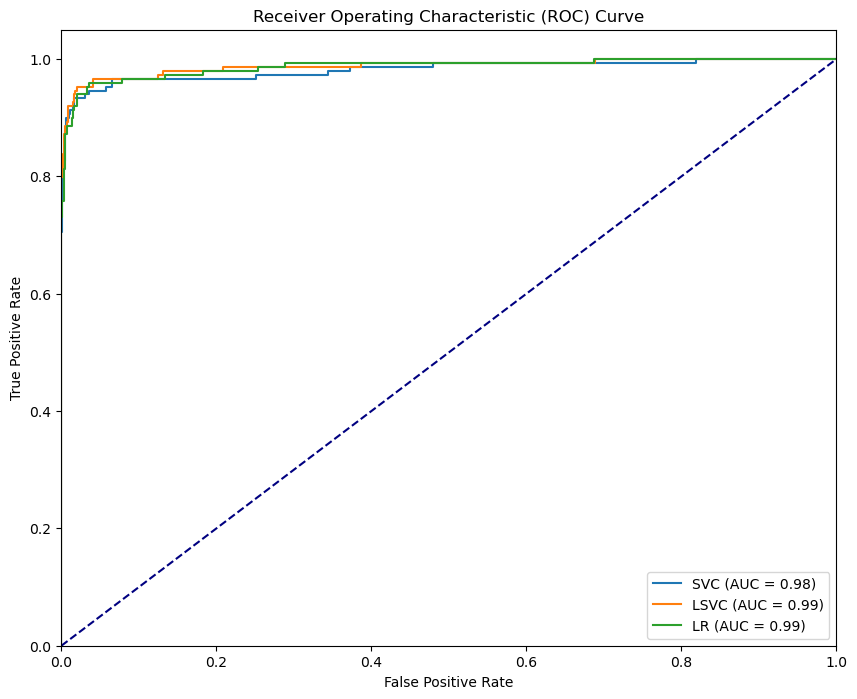

SVC - ROC AUC: 0.982
LSVC - ROC AUC: 0.988
LR - ROC AUC: 0.987


In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Trained models with optimal hyperparameters (after GridSearchCV)
models = [
    ('SVC', grid_search_svc.best_estimator_),
    ('LSVC', grid_search_lsvc.best_estimator_),
    ('LR', grid_search_lr.best_estimator_)
]

# Initialization
fpr = dict()
tpr = dict()
roc_auc = dict()

# For each model, we calculate the ROC curve and ROC AUC.
plt.figure(figsize=(10, 8))

for name, model in models:
    # Obtain probabilities for each class (for SVC, LR, LSVC).
    if name == "LSVC":
        # for LinearSVC using decision_function
        y_score = model.decision_function(features_test_dense)
    else:
        y_score = model.predict_proba(features_test_dense)[:, 1]  

    # Calcualte FPR, TPR и ROC AUC
    fpr[name], tpr[name], _ = roc_curve(targets_test, y_score)
    roc_auc[name] = roc_auc_score(targets_test, y_score)

    # building ROC curve
    plt.plot(fpr[name], tpr[name], label=f'{name} (AUC = {roc_auc[name]:.2f})')

# Making plot
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # The line of random line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show plot
plt.show()

# Display ROC AUC for each model
for name, auc in roc_auc.items():
    print(f"{name} - ROC AUC: {auc:.3f}")


## Now do the same, with using if-idf instead of BoW

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
import warnings


# Creating BoW(Bag of Words) using CountVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(data['cleaned_message'])

# Encoding labels into (0, 1)
encoder = LabelEncoder()
targets = encoder.fit_transform(data['label'])

# Split data to train and test data sets
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=0.2, random_state=42)

warnings.filterwarnings("ignore")

seed = 7
num_folds = 10
n_estimators = 100
scoring = 'accuracy'

models = [
    ('LR', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('LSVC', LinearSVC()),
    ('SVC', SVC(kernel='linear', probability=True)),
    ('BG', BaggingClassifier(n_estimators=n_estimators)),
    ('RF', RandomForestClassifier(n_estimators=n_estimators)),
    ('ET', ExtraTreesClassifier(n_estimators=n_estimators)),
    ('AB', AdaBoostClassifier(n_estimators=n_estimators)),
    ('GB', GradientBoostingClassifier(n_estimators=n_estimators)),
]

#  Results DataFrame Initialization
results_df = pd.DataFrame(
    columns=["Model", "Train_Accuracy", "Test_Accuracy", "F1_Score", "Precision", "Recall"]
)

# Evaluating Models
for name, model in models:
    print(f"Evaluating {name}...")

    # Cross-validation setup
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    # If model requires dense array, convert accordingly
    if name in ['NB']:
        features_train_dense = features_train.toarray()
        features_test_dense = features_test.toarray()
    else:
        features_train_dense = features_train
        features_test_dense = features_test

    # Cross-validation score
    cv_results = cross_val_score(model, features_train_dense, targets_train, cv=kfold, scoring=scoring)

    # Model fitting and prediction
    model.fit(features_train_dense, targets_train)
    predictions = model.predict(features_test_dense)

    # Metrics calculation
    test_accuracy = accuracy_score(targets_test, predictions)
    f1 = f1_score(targets_test, predictions, average='weighted')
    precision = precision_score(targets_test, predictions, average='weighted')
    recall = recall_score(targets_test, predictions, average='weighted')

    # Printing results
    print(
        f"{name}: Train Accuracy = {cv_results.mean():.3f} (std: {cv_results.std():.3f}), "
        f"Test Accuracy = {test_accuracy:.3f}, F1 Score = {f1:.3f}, "
        f"Precision = {precision:.3f}, Recall = {recall:.3f}"
    )

    # Storing results in DataFrame
    new_row = pd.DataFrame(
    {
        "Model": [name],
        "Train_Accuracy": [cv_results.mean()],
        "Test_Accuracy": [test_accuracy],
        "F1_Score": [f1],
        "Precision": [precision],
        "Recall": [recall],
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

#  Displaying Results
print("\nFinal Results Summary:")
print(results_df)

#  Sorting by Test Accuracy and displaying top models
results_df.sort_values(by="Test_Accuracy", ascending=False, inplace=True)


Evaluating LR...
LR: Train Accuracy = 0.945 (std: 0.015), Test Accuracy = 0.955, F1 Score = 0.951, Precision = 0.957, Recall = 0.955
Evaluating KNN...
KNN: Train Accuracy = 0.897 (std: 0.015), Test Accuracy = 0.910, F1 Score = 0.890, Precision = 0.919, Recall = 0.910
Evaluating CART...
CART: Train Accuracy = 0.964 (std: 0.012), Test Accuracy = 0.969, F1 Score = 0.968, Precision = 0.968, Recall = 0.969
Evaluating NB...
NB: Train Accuracy = 0.884 (std: 0.015), Test Accuracy = 0.891, F1 Score = 0.901, Precision = 0.927, Recall = 0.891
Evaluating LSVC...
LSVC: Train Accuracy = 0.977 (std: 0.008), Test Accuracy = 0.984, F1 Score = 0.984, Precision = 0.984, Recall = 0.984
Evaluating SVC...
SVC: Train Accuracy = 0.977 (std: 0.008), Test Accuracy = 0.983, F1 Score = 0.983, Precision = 0.983, Recall = 0.983
Evaluating BG...
BG: Train Accuracy = 0.971 (std: 0.011), Test Accuracy = 0.972, F1 Score = 0.972, Precision = 0.972, Recall = 0.972
Evaluating RF...
RF: Train Accuracy = 0.973 (std: 0.007),

### The top five models based on test accuracy:

In [137]:
results_df.head()

,Model,Train_Accuracy,Test_Accuracy,F1_Score,Precision,Recall
4,LSVC,0.977121,0.983857,0.983517,0.983875,0.983857
5,SVC,0.976897,0.982960,0.982574,0.982992,0.982960
9,AB,0.975548,0.979372,0.979035,0.979115,0.979372
7,RF,0.971062,0.977578,0.976695,0.978144,0.977578
8,ET,0.976671,0.977578,0.976849,0.977723,0.977578
